In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,6)})

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
data = pd.read_csv('covid_19_data.csv')

In [4]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


In [5]:
data = data[['ObservationDate','Confirmed','Deaths','Recovered']]

In [6]:
data.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,1.00,0.00,0.00
1,01/22/2020,14.00,0.00,0.00
2,01/22/2020,6.00,0.00,0.00
3,01/22/2020,1.00,0.00,0.00
4,01/22/2020,0.00,0.00,0.00


In [7]:
data.columns = ['Date','Confirmed','Deaths','Recovered']

In [8]:
data.head()

,Date,Confirmed,Deaths,Recovered
0,01/22/2020,1.00,0.00,0.00
1,01/22/2020,14.00,0.00,0.00
2,01/22/2020,6.00,0.00,0.00
3,01/22/2020,1.00,0.00,0.00
4,01/22/2020,0.00,0.00,0.00


In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
confirmed = data.groupby('Date').sum()['Confirmed']
deaths = data.groupby('Date').sum()['Deaths']
recovered = data.groupby('Date').sum()['Recovered']

<AxesSubplot:xlabel='Date'>

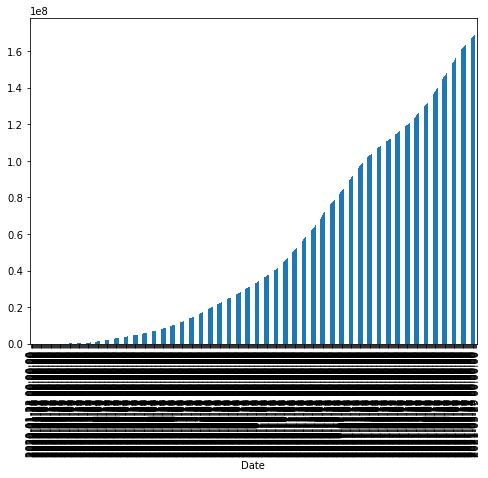

In [11]:
confirmed.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

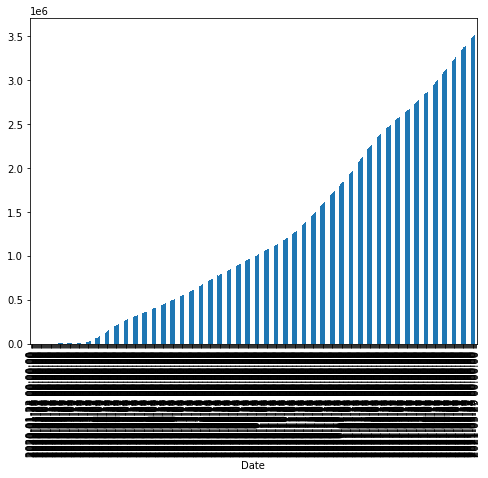

In [12]:
deaths.plot(kind='bar')

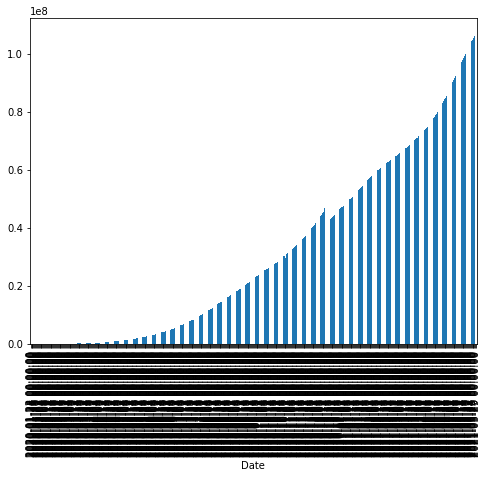

In [13]:
recovered.plot(kind='bar')
plt.show()

In [14]:
confirmed = confirmed.reset_index()
confirmed.columns = ['ds','y']

deaths = deaths.reset_index()
deaths.columns = ['ds','y']

recovered = recovered.reset_index()
recovered.columns = ['ds','y']

In [15]:
confirmed.head()

,ds,y
0,2020-01-22,557.00
1,2020-01-23,1097.00
2,2020-01-24,941.00
3,2020-01-25,1437.00
4,2020-01-26,2118.00


In [16]:
from fbprophet import Prophet
from sklearn.metrics import r2_score

## confirmed

In [18]:
### train and test
train_confirmed = confirmed[(confirmed['ds'] >= '2020-01-22') & (confirmed['ds'] <= '2021-02-25')]
test_confirmed = confirmed[ (confirmed['ds'] > '2021-02-25' )]

In [19]:
model_confirmed = Prophet(interval_width=0.95,seasonality_mode='multiplicative')
model_confirmed.fit(train_confirmed)
future_date_confirmed = model_confirmed.make_future_dataframe(periods=len(test_confirmed), freq='D')
forecast_confirmed = model_confirmed.predict(future_date_confirmed)
forecast_confirmed[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-44471.60,-1239535.64,1131124.16
1,2020-01-23,-40734.93,-1282861.22,1175635.50
2,2020-01-24,-37088.24,-1253415.10,1173286.93
3,2020-01-25,-33289.75,-1139777.15,1149126.60
4,2020-01-26,-29463.76,-1172788.19,1153618.44
...,...,...,...,...
489,2021-05-25,168654254.20,158080198.77,179889906.59
490,2021-05-26,169280603.47,158048747.68,180535493.29
491,2021-05-27,169984323.99,158363102.30,181581728.03
492,2021-05-28,171127407.56,159773539.67,183149745.24


<AxesSubplot:xlabel='ds'>

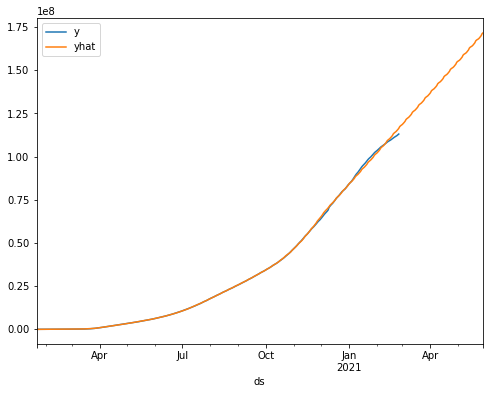

In [39]:
pd.concat([train_confirmed.set_index('ds')['y'] , forecast_confirmed.set_index('ds')['yhat']],axis=1).plot()

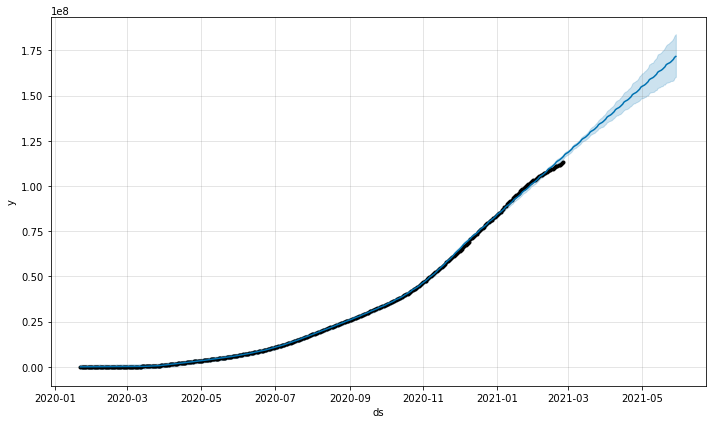

In [20]:
model_confirmed.plot(forecast_confirmed)
plt.show()

G:\Program_Files\Anaconda\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


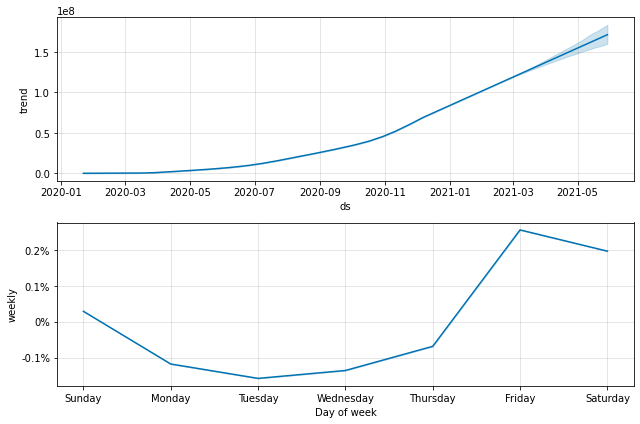

In [21]:
model_confirmed.plot_components(forecast_confirmed)
plt.show()

In [22]:
## test score
r2_score(test_confirmed['y'],forecast_confirmed['yhat'][401:])

0.9149854691097677

In [44]:
## train score
r2_score(confirmed['y'],forecast_confirmed['yhat'])

0.998063519865078

## Deaths

In [23]:
### train and test
train_deaths = deaths[(deaths['ds'] >= '2020-01-22') & (deaths['ds'] <= '2021-02-25')]
test_deaths = deaths[ (deaths['ds'] > '2021-02-25' )]

In [24]:
model_deaths = Prophet(interval_width=0.95,seasonality_mode='multiplicative')
model_deaths.fit(train_deaths)
future_date_deaths = model_deaths.make_future_dataframe(periods=len(test_deaths),freq='D')
forecast_death = model_deaths.predict(future_date_deaths)
forecast_death[['ds','yhat','yhat_lower','yhat_upper']].head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-536.22,-12449.48,11214.43
1,2020-01-23,-447.32,-11895.07,11213.52
2,2020-01-24,-358.59,-12842.36,11609.59
3,2020-01-25,-269.03,-12400.36,11076.40
4,2020-01-26,-179.31,-11862.09,12169.30


<AxesSubplot:xlabel='ds'>

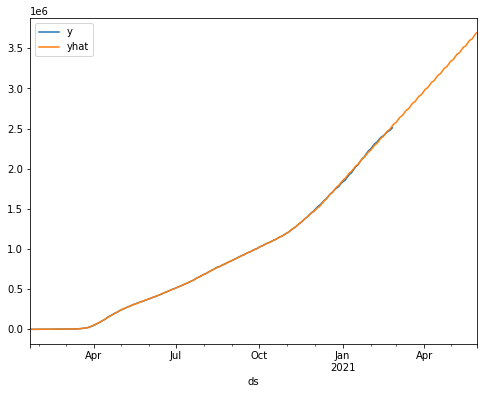

In [40]:
pd.concat([train_deaths.set_index('ds')['y'] , forecast_death.set_index('ds')['yhat']],axis=1).plot()

[]

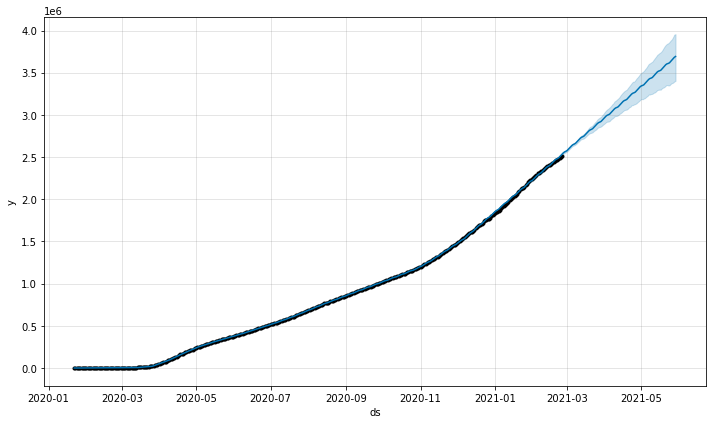

In [25]:
model_deaths.plot(forecast_death)
plt.plot()

G:\Program_Files\Anaconda\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


[]

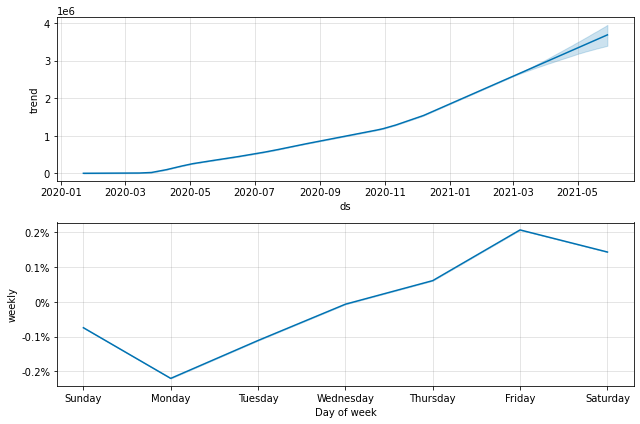

In [26]:
model_deaths.plot_components(forecast_death)
plt.plot()

In [45]:
## test score
r2_score(test_deaths['y'],forecast_death['yhat'][401:])

0.8122182930770228

In [46]:
## train score
r2_score(deaths['y'],forecast_death['yhat'])

0.9970944926342962

## Recovered

In [28]:
### train and test
train_recovered = recovered[(recovered['ds'] >= '2020-01-22') & (recovered['ds'] <= '2021-02-25')]
test_recovered = recovered[ (recovered['ds'] > '2021-02-25' )]

In [29]:
model_recovered = Prophet(interval_width=0.95,seasonality_mode='multiplicative')
model_recovered.fit(train_recovered)
future_date_recovered = model_recovered.make_future_dataframe(periods=len(test_recovered),freq='D')
forecast_recovered = model_recovered.predict(future_date_deaths)
forecast_recovered[['ds','yhat','yhat_lower','yhat_upper']].head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-89205.46,-1351900.02,1191314.92
1,2020-01-23,-85520.92,-1341191.09,1146416.93
2,2020-01-24,-81764.99,-1277730.32,1164363.51
3,2020-01-25,-78208.52,-1401614.19,1178804.89
4,2020-01-26,-74439.44,-1288467.17,1114057.93


<AxesSubplot:xlabel='ds'>

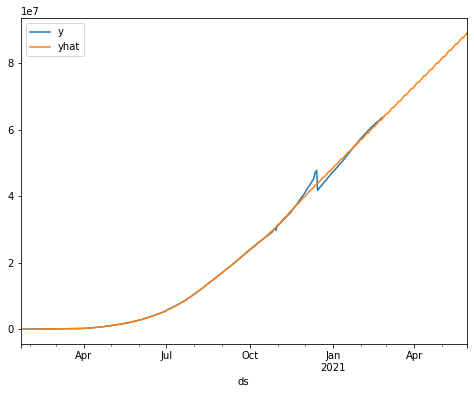

In [42]:
pd.concat([train_recovered.set_index('ds')['y'] , forecast_recovered.set_index('ds')['yhat']],axis=1).plot()

[]

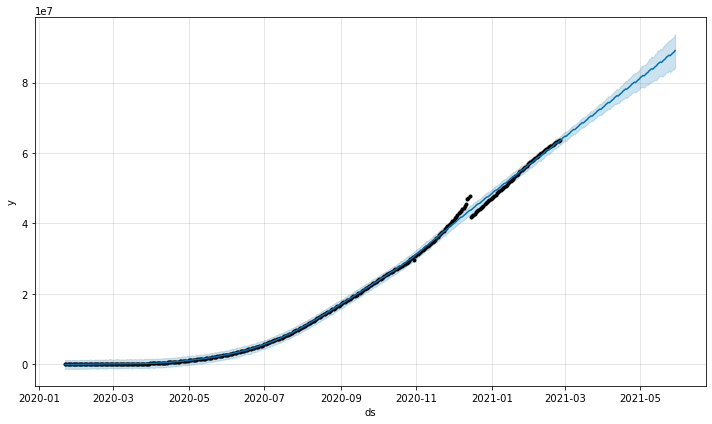

In [30]:
model_recovered.plot(forecast_recovered)
plt.plot()

G:\Program_Files\Anaconda\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


[]

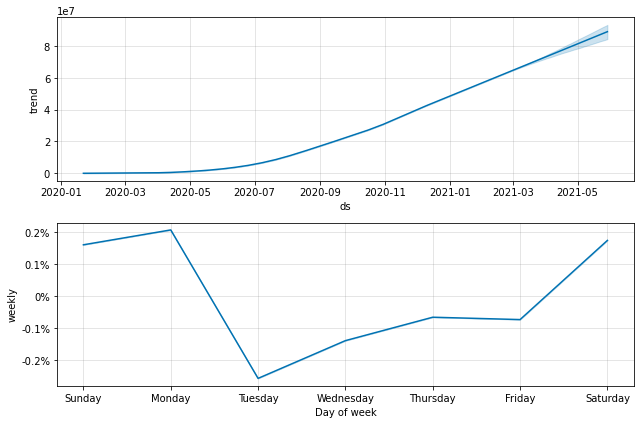

In [31]:
model_recovered.plot_components(forecast_recovered)
plt.plot()

In [48]:
# test score
r2_score(test_recovered['y'],forecast_recovered['yhat'][401:])

0.641138480137043

In [47]:
## train score
r2_score(recovered['y'],forecast_recovered['yhat'])

0.9874025636802434